## 남방톱날꽃게(청게)의 나이 예측 딥러닝 모델 구현 1

본 소스 파일에서는 홀드 아웃 교차 검증의 방법을 사용하여 70%의 데이터셋을 학습 데이터셋으로 사용하였다. 그리고 과적합을 막기 위해 EarlyStopping() 함수를 이용하여 학습 자동 중단 과정을 설정하였다.   
다중 선형 회귀 분석의 방법을 사용하여 정확도를 MAE(Mean Absolute Error)를 이용해 평가하였다.

### 1. 필요한 라이브러리 import하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager   # 한글 사용을 위해 import
import numpy as np
import tensorflow as tf

tensorflow 버전 확인하기

In [2]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.3.0


tensorboard import & version 확인하기

In [3]:
import tensorboard

tensorboard.__version__

'2.4.0'

### 2. 데이터셋 가져오기

상대경로를 사용하여 최종적으로 가공된 데이터셋을 가져온다.

In [4]:
filepath = "./3_Dataset.csv"

In [5]:
df = pd.read_csv(filepath)

In [6]:
df

,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,1.488349,1.700970,6,0,1,0
...,...,...,...,...,...,...,...,...,...,...
3847,1.4625,1.1375,0.3250,24.819987,5.854172,6.378637,8,1,0,0
3848,1.5500,1.2125,0.4375,34.458817,7.172423,9.780577,10,1,0,0
3849,0.6250,0.4625,0.1625,2.012815,0.524466,0.637864,5,0,1,0
3850,1.0625,0.7750,0.2625,10.347568,2.338834,2.976698,6,0,1,0


### 3. 딥러닝을 위해 독립변수(x)와 종속변수(y)로 데이터 분리하기

In [7]:
#종속변수 
df_y = df['Age']
#독립변수
df_x = df.drop(['Age'], axis=1)

In [8]:
df_x.head()

,Length,Diameter,Height,Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,5.584852,6.747181,1,0,0
1,0.8875,0.6500,0.2125,5.400580,1.374951,1.559222,0,0,1
2,1.0375,0.7750,0.2500,7.952035,1.601747,2.764076,0,1,0
3,1.1750,0.8875,0.2500,13.480187,2.282135,5.244657,1,0,0
4,0.8875,0.6625,0.2125,6.903103,1.488349,1.700970,0,1,0


In [9]:
df_y.head()

0     9
1     6
2     6
3    10
4     6
Name: Age, dtype: int64

### 4. 데이터셋을 training 데이터셋과 test 데이터셋으로 분리

In [10]:
# 실행할 때마다 같은 결과를 출력하기 위해 아래처럼 설정
seed = 2  # seed 값이 같으면 똑같은 랜덤 값을 출력함
np.random.seed(seed)
tf.random.set_seed(seed)

from sklearn.model_selection import train_test_split 

In [11]:
# 트레이닝 데이터셋 : 70%, 테스트 데이터셋 : 30%
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=seed)

학습 데이터 개수와 테스트 데이터 개수 출력 

In [12]:
print( "학습 데이터 개수 : %d  ,  테스트 데이터 개수 %d  "  %(len(X_train), len(X_test)))

학습 데이터 개수 : 2696  ,  테스트 데이터 개수 1156  


In [13]:
print('-> type(X_train) : ', type(X_train))          # train_test_split( ) 함수의 return 값은 numpy.ndarray 타입
print('-> 학습 데이터 모양 : ',  np.shape(X_train))  # 학습 데이터 모양 
print('-> 학습 데이터 개수 : ', len(X_train), '개')  # 학습 데이터 개수 
print("\n학습 데이터 속성")
print(X_train)                                       # 학습 데이터 속성 확인

print('-'*90)

print('-> type(X_test) : ', type(X_test))          
print('-> 테스트 데이터 모양 : ',  np.shape(X_test)) # 테스트 데이터 모양 
print('-> 테스트 데이터 개수 : ', len(X_test), '개') # 테스트 데이터 개수 
print("\n테스트 데이터 속성")
print(X_test)                                        # 테스트 데이터 속성 확인

-> type(X_train) :  <class 'pandas.core.frame.DataFrame'>
-> 학습 데이터 모양 :  (2696, 9)
-> 학습 데이터 개수 :  2696 개

학습 데이터 속성
      Length  Diameter  Height     Weight  Viscera Weight  Shell Weight  \
530   1.4500    1.1500  0.4500  29.809499        7.356695      7.824462   
986   1.4375    1.0750  0.3875  22.552027        5.457279      6.236890   
2683  1.6750    1.3125  0.4250  39.703475        8.575724     10.971257   
1269  1.2500    1.0500  0.3375  19.178437        4.011454      5.854172   
2891  1.2625    0.9500  0.3375  19.433582        4.436697      4.564269   
...      ...       ...     ...        ...             ...           ...   
3606  1.7750    1.3875  0.4250  41.673765       10.772810     12.218635   
1608  1.3875    1.0500  0.3625  24.649890        7.299996      7.087375   
2541  0.8375    0.6500  0.2250   5.570677        1.162330      1.587572   
2575  1.4250    1.0875  0.3500  24.338046        5.556502      6.506210   
3240  0.9000    0.6625  0.2125   5.372230        1.459999

### 5. 딥러닝 모델 설계하기

Keras TensorBoard 결과를 기록할 로그 디렉토리 생성   

In [14]:
from datetime import datetime

In [15]:
datetime.now()

datetime.datetime(2021, 12, 21, 23, 45, 29, 541255)

In [16]:
datetime.now().strftime("%Y%m%d-%H%M%S") 

'20211221-234529'

현재 날짜와 시각을 디렉토리 이름으로 이용해 로그 디렉토리를 생성 

In [17]:
logdir="logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")

In [18]:
# 로그 디렉토리
logdir 

'logs\\20211221-234529'

In [19]:
import os
os.getcwd()  # 현재 디렉토리 확인 

'C:\\ai\\SW_HW\\final'

Keras TensorBoard 콜백을 정의

콜백: 다른 함수의 인자로 넘겨진 다음, 특정 이벤트에 의해 호출되는 함수

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

#### 딥러닝 구조를 결정(모델을 설정)

In [21]:
#keras에서 제공되는 Sequential 모델 
model = Sequential()

#1번째 층 : 입력 x는 9개, 출력은 12개, 활성화함수 relu 
model.add(Dense(12, input_dim=9, activation='relu'))

#2번째 층 : 입력 x는 12개, 출력은 9개, 활성화함수 relu 
model.add(Dense(8, activation='relu'))

#3번째 층 : 입력 x는 9개, 출력은 1개, 활성화함수 linear
model.add(Dense(1, activation='linear'))

In [22]:
model

summary() 함수로 모델 설명 보기

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


### 6. 딥러닝 모델 컴파일 및 실행하기

keras의 Sequential 모델에서 제공하는 compile() 기능으로 loss(손실 함수), optimizer(정규화기), metrics(평가지표)를 설정한다.  
mse: Mean Square Error  
adam: Adaptive moment estimation  
mae: Mean Absolute Error

In [24]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

#### 학습 조기 종료를 위한 EarlyStopping() 함수  
monitor : 관찰하고자 하는 항목  
patience : monitor에 설정한 항목에 대한 개선이 없을 때 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정  
mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정(min : 관찰 중인 항목이 감소되지 않을 때 종료)

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

batch_size=10로 하면 2696개의 데이터를 10개씩 처리하므로 실행 결과에서 270/270 출력   
epochs : 학습의 횟수 의미 

In [26]:
# 그래프를 그리기 위해 model.fit 부분에 callbacks=[tensorboard_callback] 사용
history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test), callbacks=[tensorboard_callback, early_stopping])

Epoch 1/50
  1/270 [..............................] - ETA: 0s - loss: 186.1571 - mae: 12.5851WARNING:tensorflow:From C:\Users\x\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
270/270 [==============================] - 1s 2ms/step - loss: 37.3301 - mae: 4.9098 - val_loss: 18.2400 - val_mae: 3.4999
Epoch 2/50
270/270 [==============================] - 0s 1ms/step - loss: 17.5713 - mae: 3.4179 - val_loss: 14.9117 - val_mae: 3.1103
Epoch 3/50
270/270 [==============================] - 0s 1ms/step - loss: 14.2251 - mae: 2.9968 - val_loss: 11.5876 - val_mae: 2.6421
Epoch 4/50
270/270 [==============================] - 0s 1ms/step - loss: 10.7387 - mae: 2.4998 - val_loss: 8.5297 - val_mae: 2.2272
Epoch 5/50
270/270 [==============================] - 0s 1ms/step - loss: 8.0304 - mae: 2.0871 - val_loss

#### 딥러닝 실행 후 loss, mae 출력해보기

In [27]:
history # 콜백

cmd 창에서 Keras TensorBoard를 확인할 수 있다.  
나의 경우는 다음과 같이 입력하여 확인할 수 있었다.

C:\Users\x>  

현재 작업 디렉토리로 이동
C:\Users\x>cd C:\ai\SW_HW\final  

tensorboard --logdir=.\ 를 입력하고 위에서 설정한 로그 디렉토리를 뒤에 붙여줌
C:\ai\SW_HW\final>tensorboard --logdir=.\logs\\20211221-200029  

아래와 같은 문구가 나오고 주소를 copy하여 크롬에 주소창에 입력
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.0 at http://localhost:6006/ (Press CTRL+C to quit)

In [28]:
print(history.history['loss'])

[37.33009338378906, 17.571258544921875, 14.225144386291504, 10.738670349121094, 8.030350685119629, 6.627478122711182, 6.037097930908203, 5.803431034088135, 5.644476413726807, 5.559966087341309, 5.564120769500732, 5.505855560302734, 5.495103359222412, 5.487698554992676, 5.432581901550293, 5.449041366577148, 5.403472900390625, 5.361240386962891, 5.512025356292725, 5.374244213104248, 5.394309997558594, 5.360284328460693, 5.393057346343994, 5.301196098327637, 5.404922008514404, 5.4070916175842285, 5.393502712249756, 5.3209967613220215, 5.335764408111572, 5.351325035095215, 5.341629981994629, 5.3264384269714355, 5.321289539337158, 5.375435829162598, 5.373011589050293, 5.322828769683838, 5.331732749938965, 5.359751224517822, 5.385314464569092, 5.39692497253418, 5.320846080780029, 5.277155876159668, 5.360908508300781, 5.3361430168151855, 5.3459086418151855, 5.311273097991943, 5.3681960105896, 5.305985450744629, 5.302430629730225, 5.289489269256592]


In [29]:
print(history.history['mae'])

[4.909797191619873, 3.417940378189087, 2.996842861175537, 2.4997870922088623, 2.0870726108551025, 1.8729848861694336, 1.779295802116394, 1.7368645668029785, 1.709478497505188, 1.6876758337020874, 1.696815013885498, 1.6830475330352783, 1.6769943237304688, 1.6854854822158813, 1.6683826446533203, 1.6675963401794434, 1.6608667373657227, 1.653298258781433, 1.6829512119293213, 1.6537352800369263, 1.6567392349243164, 1.6538364887237549, 1.6579240560531616, 1.6461962461471558, 1.6564408540725708, 1.6640129089355469, 1.6538082361221313, 1.649598479270935, 1.6478487253189087, 1.6539955139160156, 1.6515276432037354, 1.6435978412628174, 1.6391559839248657, 1.654273509979248, 1.6479840278625488, 1.6431995630264282, 1.6502238512039185, 1.6448434591293335, 1.6498643159866333, 1.654491901397705, 1.6422923803329468, 1.632064700126648, 1.653359293937683, 1.6337794065475464, 1.6419031620025635, 1.639577031135559, 1.6452486515045166, 1.6406989097595215, 1.6440147161483765, 1.6250349283218384]


### 7. 딥러닝 평가하기

#### keras의 Sequential 모델에서 제공하는 model.evaluate( ) 함수 사용
return value : [mse, mae]

In [30]:
print('-> 테스트 데이터 개수 : ', len(X_test), '개')
ev = model.evaluate(X_test, Y_test, batch_size=1)
print('-> [mse, mae] =' , ev) 

-> 테스트 데이터 개수 :  1156 개
1156/1156 [==============================] - 1s 854us/step - loss: 4.7601 - mae: 1.5869
-> [mse, mae] = [4.760054588317871, 1.5868895053863525]


전체 데이터의 30%에 해당하는 1156개의 테스트 데이터셋으로 MAE() 계산 결과를 출력  
batch_size=10 : 1156개의 데이터를 10개씩 처리하므로 실행 결과에서 116/116 출력

In [31]:
print("\n MAE : %.4f" % (model.evaluate(X_test, Y_test, batch_size=10)[1])) 

116/116 [==============================] - 0s 510us/step - loss: 4.7601 - mae: 1.5869

 MAE : 1.5869


MAE 값이 1.5869가 나왔으므로 꽃게 나이 예측의 평균적인 오차값은 1.5869개월이라는 것을 알 수 있다.  

#### 그래프를 통해 loss를 시각화 

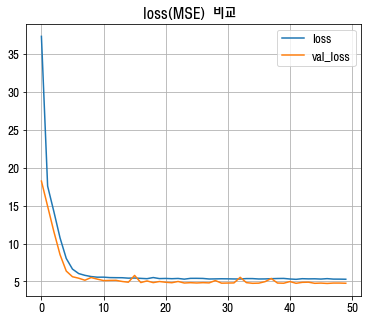

In [32]:
font_path = "C:\\Windows\\Fonts\\HMFMMUEX.TTC"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name, size=11) 
plt.figure(figsize=(6,5))

plt.title('loss(MSE) 비교 ', fontsize=14)
plt.plot(history.history['loss'])      # 트레이닝 데이터셋의 loss
plt.plot(history.history['val_loss'])  # 테스트 데이터셋의 loss
plt.legend(['loss','val_loss']) # 범례
plt.grid()
plt.show()

위의 그래프를 보면 트레이닝 데이터셋의 loss와 테스트 데이터셋의 loss 모두 epochs가 증가할수록 감소하는 경향을 보임을 확인할 수 있었다. 그런데 특이한 점은 테스트 데이터셋의 loss가 트레이닝 데이터셋의 loss 보다 더 작은 경향을 보인다는 것이다.  

#### 그래프를 통해 MAE를 시각화 

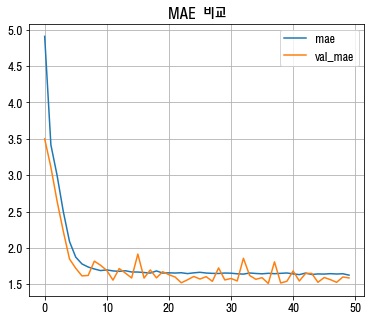

In [33]:
plt.rc('font', family=font_name, size=11) 
plt.figure(figsize=(6,5))

plt.title('MAE 비교', fontsize=14)
plt.plot(history.history['mae'])      # 트레이닝 데이터셋의 mae
plt.plot(history.history['val_mae'])  # 테스트 데이터셋의 mae
plt.legend(['mae','val_mae']) # 범례
plt.grid()
plt.show()

### 8. 새로운 데이터를 위의 딥러닝 모델을 사용하여 예측하기 

keras의 Sequential 모델에서 제공하는 predict() 함수를 사용  
아직 학습과 테스트에 사용하지 않은 데이터를 사용해 예측하였다.

In [34]:
# Length, Diameter, Height, Weight, Viscera Weight, Shell Weight, Sex_F, Sex_I, Sex_M
crab1 = np.array([[1.5305, 1.185, 0.4135, 24.7356155, 5.5858415, 6.749191, 1, 0, 0]])
crab2 = np.array([[0.8975,0.67,0.2305,5.50050975,1.37645075,1.5602225,0,0,1]])

test_crab1 = model.predict(crab1)
test_crab2 = model.predict(crab2)

print("crab1 나이 예측 : %.f" %test_crab1, "개월")
print("crab2 나이 예측 : %.f" %test_crab2, "개월")

crab1 나이 예측 : 11 개월
crab2 나이 예측 : 8 개월


# 실제 데이터를 바탕으로 만든 가상의 꽃게 데이터에서 딥러닝 모델이 꽤 정확하게 동작함을 확인할 수 있었다.  
crab1은 데이터 셋의 첫 번째 crab 데이터의 각 독립변수들을 조금씩 증가시켜 생후 11개월 정도의 crab을 만들었고, crab2는 데이터 셋의 두 번째 crab 데이터의 각 독립변수들을 조금씩 증가시켜 생후 8개월 정도의 crab을 만든 것이다.

### 9. 학습 모델 저장하기

In [35]:
model.save('CrabAge1.h5') 

### 10. 분석

데이터셋의 꽃게의 나이가 적게는 5개월에서 많게는 23개월이기 때문에 꽃게 나이 예측의 평균적인 오차값이 1.5869개월인 것은 상당히 예측이 잘 되었다고 생각한다. 그 이유는 데이터셋 정제가 상당히 잘 되었고, 과적합을 막기 위해 EarlyStopping() 함수를 사용하는 등의 노력을 기울여서일 것이라고 생각한다. 또한, 꽃게의 나이가 Length, Diameter, Height, Weight, Viscera Weight, Shell Weight에 대해 높은 양의 상관관계를 가지고 있었기 때문에 나이 예측이 수월했었다고 생각한다.  
이후 나는 딥러닝 모델에서 똑같이 3개의 층을 사용하는 대신 K겹 교차 검증 방식과 validation_split을 이용해 학습 과정에서 loss와 val_loss를 비교하는 방법을 사용해 어떤 딥러닝 모델이 가장 오차가 작은지 알아보고자 한다.